In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the data
df = pd.read_csv('Plant_Parameters.csv')

# Split the data into features (x) and target variable (y)
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the Decision Tree classifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

# Example with missing values in the input
input_values = [[6.552203,None,None,None,None, None,None,76.42675,72.28084]]

# Fill missing values with mean values from training data
input_values = pd.DataFrame(input_values, columns=df.columns[:-1])

# Check and fill missing values for each column separately
for col in input_values.columns:
    if input_values[col].isnull().any():
        input_values[col].fillna(X_train[:, df.columns.get_loc(col)].mean(), inplace=True)

# Standardize the input using the same scaler used for training
input_values_scaled = sc.transform(input_values)

# Make the prediction
prediction = classifier.predict(input_values_scaled)

print("Predicted class:", prediction)


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the data
df = pd.read_csv('Plant_Parameters.csv')

# Split the data into features (x) and target variable (y)
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the CatBoost classifier
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)




Learning rate set to 0.098617
0:	learn: 1.6486101	total: 194ms	remaining: 3m 13s
1:	learn: 1.3548353	total: 241ms	remaining: 2m
2:	learn: 1.1571705	total: 289ms	remaining: 1m 36s
3:	learn: 1.0092584	total: 335ms	remaining: 1m 23s
4:	learn: 0.8947103	total: 382ms	remaining: 1m 16s
5:	learn: 0.8041735	total: 434ms	remaining: 1m 11s
6:	learn: 0.7281487	total: 481ms	remaining: 1m 8s
7:	learn: 0.6653928	total: 531ms	remaining: 1m 5s
8:	learn: 0.6114661	total: 578ms	remaining: 1m 3s
9:	learn: 0.5634366	total: 625ms	remaining: 1m 1s
10:	learn: 0.5230235	total: 673ms	remaining: 1m
11:	learn: 0.4877015	total: 718ms	remaining: 59.1s
12:	learn: 0.4553312	total: 765ms	remaining: 58.1s
13:	learn: 0.4281249	total: 811ms	remaining: 57.1s
14:	learn: 0.4035141	total: 856ms	remaining: 56.2s
15:	learn: 0.3819845	total: 904ms	remaining: 55.6s
16:	learn: 0.3622280	total: 953ms	remaining: 55.1s
17:	learn: 0.3441856	total: 1s	remaining: 54.9s
18:	learn: 0.3284948	total: 1.05s	remaining: 54.5s
19:	learn: 0.31

In [3]:
# Example with missing values in the input
input_values = [[6.021427916,None,15.98794727,133.2061927,None,None,None,79.2340059,52.09408267]]

# Fill missing values with mean values from training data
input_values = pd.DataFrame(input_values, columns=df.columns[:-1])

# Check and fill missing values for each column separately
for col in input_values.columns:
    if input_values[col].isnull().any():
        input_values[col].fillna(X_train[:, df.columns.get_loc(col)].mean(), inplace=True)

# Standardize the input using the same scaler used for training
input_values_scaled = sc.transform(input_values)

# Make the prediction
prediction = classifier.predict(input_values_scaled)

print("Predicted class:", prediction)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print("Accuracy:",accuracy)

Predicted class: [['Carrots']]
Accuracy: 0.90612


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [4]:
y_train_pred = classifier.predict(X_train)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Carrots' 'Carrots']
 ['Strawberries' 'Strawberries']
 ['Rice' 'Rice']
 ...
 ['Tomato' 'Tomato']
 ['Corn' 'Corn']
 ['Chili' 'Chili']]


In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[7293    0    0    0    0    0  226    0    0    0]
 [   0 7286    0    0  193    0    0    0    0    0]
 [   0    0 7552    0    0    0    0    0    0    0]
 [   0    0    0 5795    0    0    0 1724    0    0]
 [   0 1039    0    0 6431    0    0    0    0    0]
 [   0    0    0    0    0 7502    0    0    0    0]
 [  21    0    0    0    0    0 7413    0    0    0]
 [   0    0    0   76    0    0    0 7453    0    0]
 [   0    0    0    0    0    0    0    0 7505    0]
 [   0    0    0    0    0    0    0    0    0 7491]]


0.95628

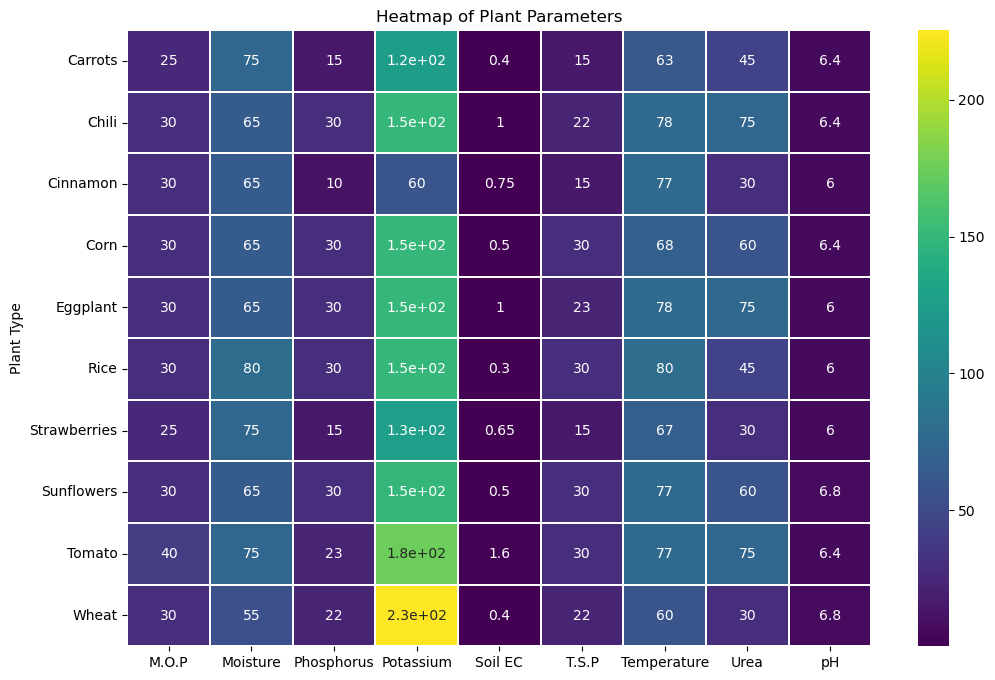

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Plant_Parameters.csv'
df = pd.read_csv(file_path)

# Assuming 'Category' is the categorical independent variable
# and other columns are dependent variables
heatmap_data = df.pivot_table(index='Plant Type', values=df.columns[1:])

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', linewidths=.25)

# Display the plot
plt.title('Heatmap of Plant Parameters')
plt.show()


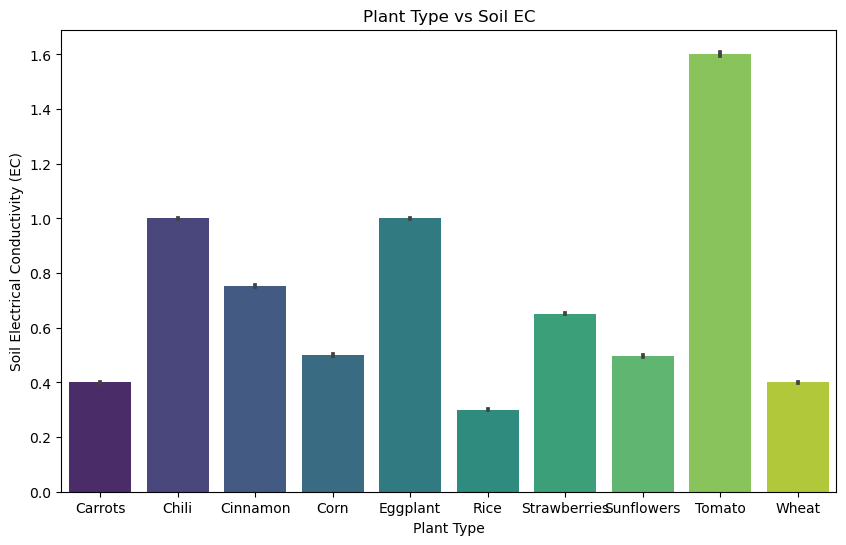

In [2]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Plant Type', y='Soil EC', data=df, palette='viridis')


plt.xlabel('Plant Type')
plt.ylabel('Soil Electrical Conductivity (EC)')
plt.title('Plant Type vs Soil EC')


plt.show()


C:\Users\use\AppData\Local\Temp\ipykernel_18548\1862436251.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Plant Type', y='Moisture', data=df, palette='viridis')


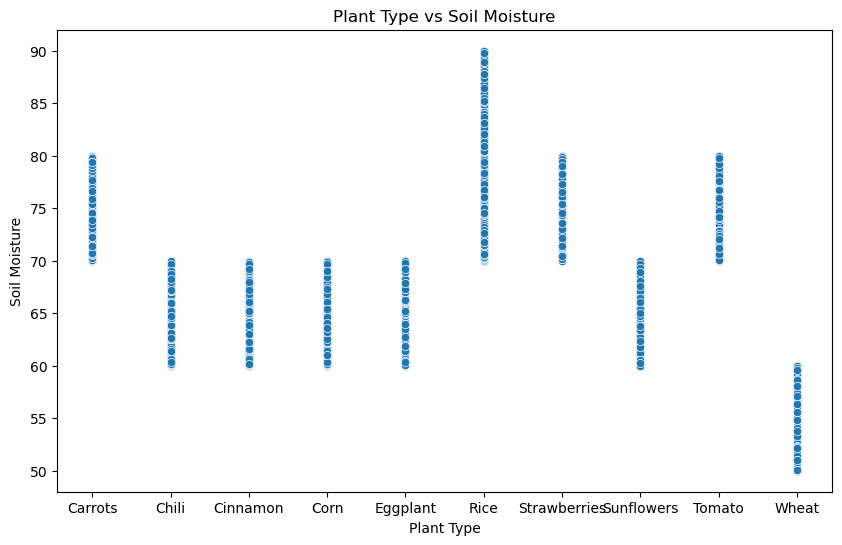

In [4]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Plant Type', y='Moisture', data=df, palette='viridis')


plt.xlabel('Plant Type')
plt.ylabel('Soil Moisture')
plt.title('Plant Type vs Soil Moisture')


plt.show()

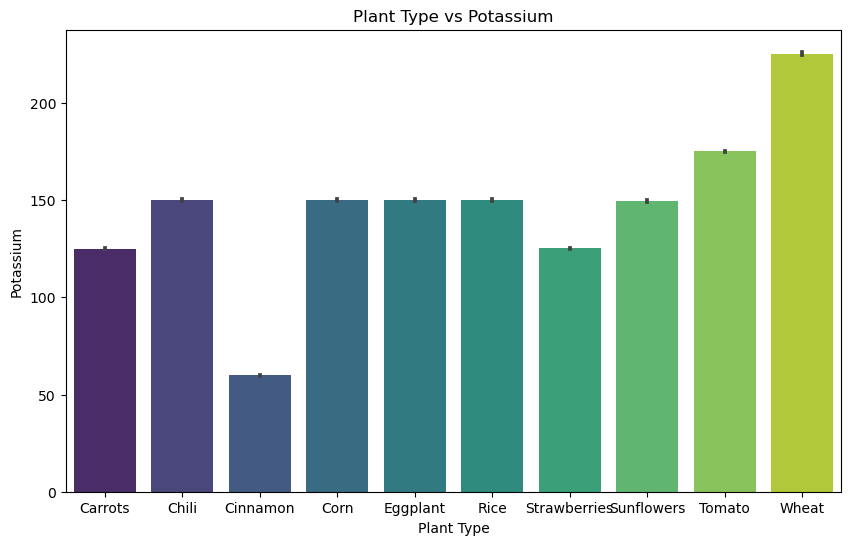

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Plant Type', y='Potassium', data=df, palette='viridis')


plt.xlabel('Plant Type')
plt.ylabel('Potassium')
plt.title('Plant Type vs Potassium')


plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the data
df = pd.read_csv('Plant_Parameters.csv')

# Split the data into features (x) and target variable (y)
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the CatBoost classifier

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Example with missing values in the input
input_values = [[6.021427916,None,15.98794727,133.2061927,None,None,None,79.2340059,52.09408267]]

# Fill missing values with mean values from training data
input_values = pd.DataFrame(input_values, columns=df.columns[:-1])

# Check and fill missing values for each column separately
for col in input_values.columns:
    if input_values[col].isnull().any():
        input_values[col].fillna(X_train[:, df.columns.get_loc(col)].mean(), inplace=True)

# Standardize the input using the same scaler used for training
input_values_scaled = sc.transform(input_values)

# Make the prediction
prediction = classifier.predict(input_values_scaled)

print("Predicted class:", prediction)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print("Accuracy:",accuracy)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the data
df = pd.read_csv('Plant_Parameters.csv')

# Split the data into features (x) and target variable (y)
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


# Example with missing values in the input
input_values = [[6.021427916,None,15.98794727,133.2061927,None,None,None,79.2340059,52.09408267]]

# Fill missing values with mean values from training data
input_values = pd.DataFrame(input_values, columns=df.columns[:-1])

# Check and fill missing values for each column separately
for col in input_values.columns:
    if input_values[col].isnull().any():
        input_values[col].fillna(X_train[:, df.columns.get_loc(col)].mean(), inplace=True)

# Standardize the input using the same scaler used for training
input_values_scaled = sc.transform(input_values)

# Make the prediction
prediction = classifier.predict(input_values_scaled)

print("Predicted class:", prediction)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print("Accuracy:",accuracy)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Predicted class: ['Carrots']
Accuracy: 0.879


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the data
df = pd.read_csv('Plant_Parameters.csv')

# Split the data into features (x) and target variable (y)
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the SVC classifier
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Example with missing values in the input
input_values = [[6.021427916,None,15.98794727,133.2061927,None,None,None,79.2340059,52.09408267]]

# Fill missing values with mean values from training data
input_values = pd.DataFrame(input_values, columns=df.columns[:-1])

# Check and fill missing values for each column separately
for col in input_values.columns:
    if input_values[col].isnull().any():
        input_values[col].fillna(X_train[:, df.columns.get_loc(col)].mean(), inplace=True)

# Standardize the input using the same scaler used for training
input_values_scaled = sc.transform(input_values)

# Make the prediction
prediction = classifier.predict(input_values_scaled)

print("Predicted class:", prediction)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print("Accuracy:",accuracy)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Predicted class: ['Carrots']
Accuracy: 0.88948


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the data
df = pd.read_csv('Plant_Parameters.csv')

# Split the data into features (x) and target variable (y)
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the SVM kernel classifier
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Example with missing values in the input
input_values = [[6.021427916,None,15.98794727,133.2061927,None,None,None,79.2340059,52.09408267]]

# Fill missing values with mean values from training data
input_values = pd.DataFrame(input_values, columns=df.columns[:-1])

# Check and fill missing values for each column separately
for col in input_values.columns:
    if input_values[col].isnull().any():
        input_values[col].fillna(X_train[:, df.columns.get_loc(col)].mean(), inplace=True)

# Standardize the input using the same scaler used for training
input_values_scaled = sc.transform(input_values)

# Make the prediction
prediction = classifier.predict(input_values_scaled)

print("Predicted class:", prediction)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print("Accuracy:",accuracy)